# Forecasting Timeseries Using Facebook FbProphet

Steps Required With FbProphet-

1. Installation

2. Data Preprocessing With Time Seires

3. Model Fitting

4. Obtaining The Forecasts

5. Plotting The Forecasts

6. Cross Validation

7. Computing Performance Metrics

8. Visualize the Performance Metrics

1. Installation: 

In [1]:
# Open Anaconda Prompt with 'Run as Administrator' by Right-clicking on it. 
# Create Virtual Environment: conda create -n TS python=3.7
# conda activate TS
# conda install -c anaconda ephem
# conda install -c conda-forge pystan
# conda install -c conda-forge fbprophet

# Click y everytime

In [2]:
#!pip install pystan

In [3]:
#!pip install fbprophet

In [4]:
#!conda install -c conda-forge fbprophet

In [5]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

2. Data Pre-processing:

In [6]:
# Dataset has to be in same working directory or folder where code is.

In [7]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
df.drop(168,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [11]:
df.columns=["ds","y"]

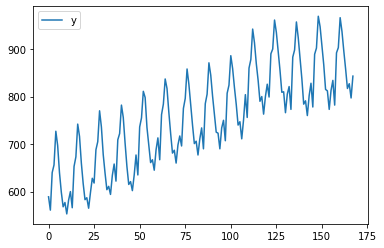

In [12]:
df.plot()

In [13]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [14]:
df['ds']=pd.to_datetime(df['ds'])

In [15]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


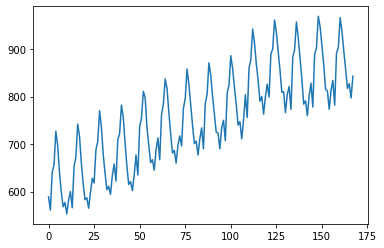

In [16]:
df['y'].plot()

In [17]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


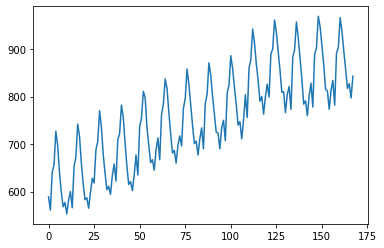

In [18]:
df['y'].plot()

In [19]:
from fbprophet import Prophet

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [21]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


3. Model Fitting:

In [22]:
# Intiialize the Model
model=Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
model

In [24]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [25]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

4. Obtaining Forecast:

In [26]:
# Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [27]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [28]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [29]:
# Prediction
prediction=model.predict(future_dates)

In [30]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,576.785826,596.805102,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,536.184972,556.299353,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,631.143849,651.610376,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,648.607305,668.176902,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,710.951791,731.178467,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [31]:
(8.974783+27.786856)/2

18.3808195

In [32]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.170733,803.676773,825.955477
529,1976-11-27,818.390320,807.162482,830.003350
530,1976-11-28,821.779740,810.086742,831.915669
531,1976-11-29,825.275899,813.610976,835.187079
532,1976-11-30,828.808844,817.797340,839.300421


In [33]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.745106,576.785826,596.805102
1,1962-02-01,546.026015,536.184972,556.299353
2,1962-03-01,641.535653,631.143849,651.610376
3,1962-04-01,658.585263,648.607305,668.176902
4,1962-05-01,721.562045,710.951791,731.178467


5. Plotting the Forecasts: 
    
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. 

This is achieved using model.plot() and passing in our forecasts as the argument. 

The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

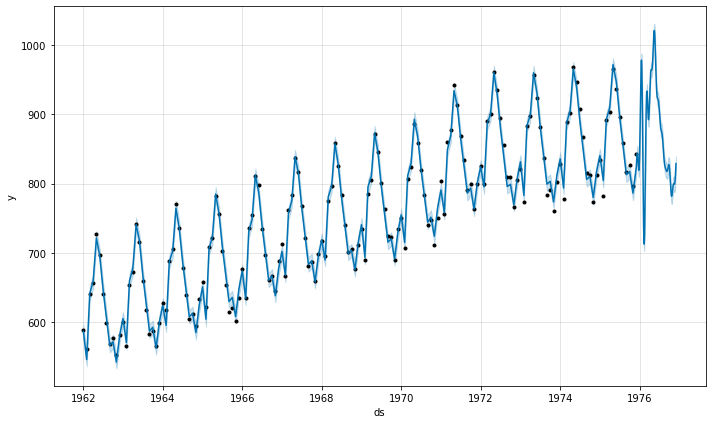

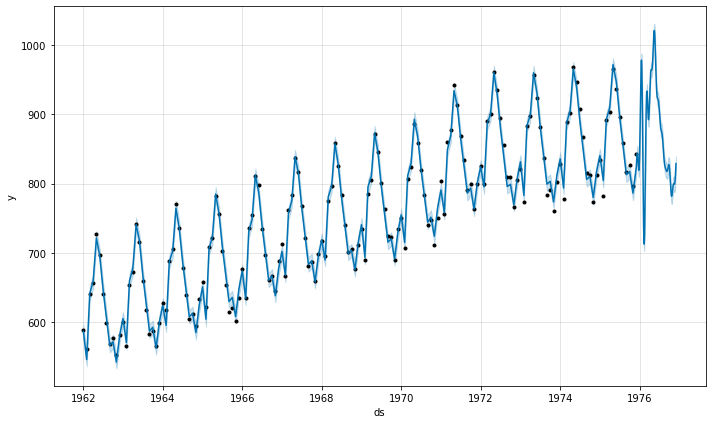

In [34]:
# Plot the predicted projection
model.plot(prediction)

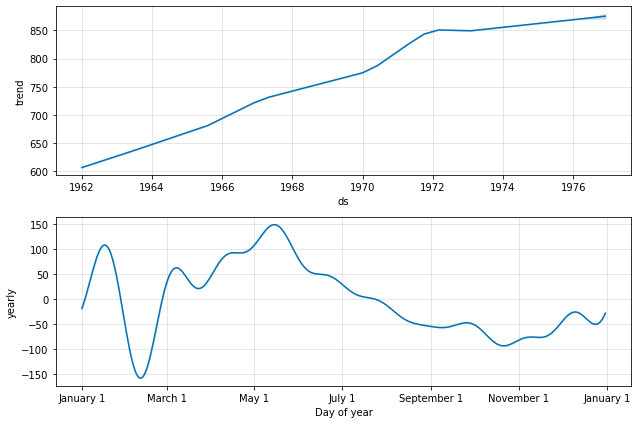

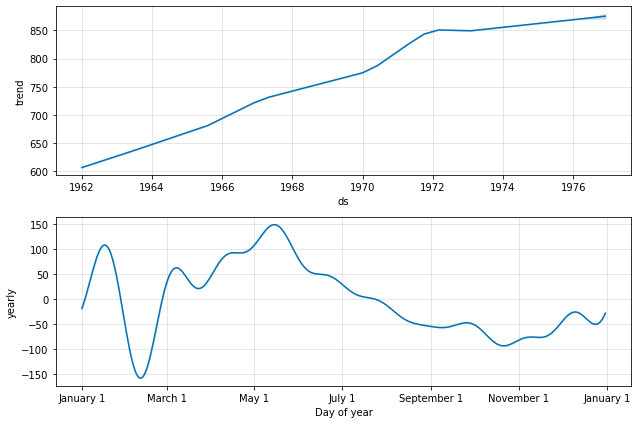

In [35]:
# Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

6. Cross Validation:
    
Next let’s measure the forecast error using the historical data. 

We’ll do this by comparing the predicted values with the actual values. 

In order to perform this operation we select cut of points in the history of the data and 
fit the model with data upto that cut off point. 

Afterwards we compare the actual values to the predicted values. 

The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. Horizon the forecast horizon.

2. Initial the size of the initial training period.

3. Period the spacing between cutoff dates.

In [36]:
df.shape

(168, 2)

In [37]:
from fbprophet.diagnostics import cross_validation

In [38]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [39]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [40]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.266314,620.742556,622.0,1965-01-22
1,1965-03-01,697.071986,691.017309,702.721285,709.0,1965-01-22
2,1965-04-01,709.290761,696.809025,720.659456,722.0,1965-01-22
3,1965-05-01,774.436723,753.078595,793.304951,782.0,1965-01-22
4,1965-06-01,742.879282,712.026263,770.519260,756.0,1965-01-22


7. Obtaining the Performance Metrics:
    
We use the performance_metrics utility to compute the Mean Squared Error(MSE), 
Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and 
the coverage of the the yhat_lower and yhat_upper estimates.

In [41]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.32
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.32
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.32
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.32
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.32


8. Visualizing the Performance Metrics:

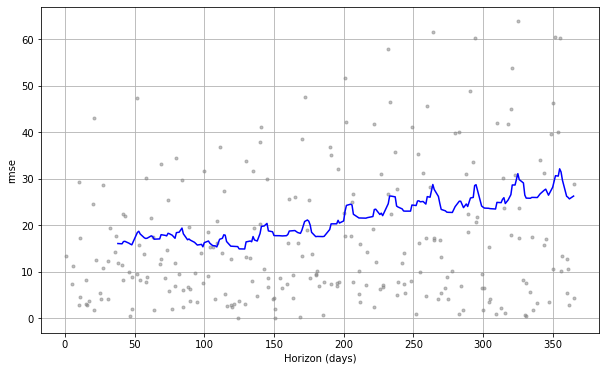

In [42]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')